In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv('Pharma_Industry.csv')

In [3]:
df.shape

(500, 6)

In [4]:
df.head()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
0,-0.128538,0.303280,-1.881849,0.258286,-0.792011,1
1,-1.846188,2.865142,-0.929511,2.866786,-0.719447,1
2,-1.252393,-1.541613,0.363632,-0.325370,0.191314,0
3,1.992515,-1.142779,-0.766657,0.975286,-0.823355,1
4,0.377100,0.538410,-0.029263,1.896015,-0.960130,1


In [6]:
df.describe()

,Drug Dosage (mg),Systolic Blood Pressure (mmHg),Heart Rate (BPM),Liver Toxicity Index (U/L),Blood Glucose Level (mg/dL),Drug Response
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.0000
mean,-0.037761,0.214957,0.062871,0.054398,-0.171863,0.5200
std,0.979891,1.247567,0.971978,0.986001,0.983765,0.5001
min,-3.019512,-3.773897,-2.940389,-3.401277,-3.110431,0.0000
25%,-0.642003,-0.565168,-0.648157,-0.586085,-0.797715,0.0000
50%,-0.019340,0.201532,0.027732,-0.065661,-0.108106,1.0000
75%,0.641151,0.951375,0.710774,0.633914,0.513555,1.0000
max,2.949094,4.111751,3.193108,3.373269,2.518023,1.0000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug Dosage (mg)                500 non-null    float64
 1   Systolic Blood Pressure (mmHg)  500 non-null    float64
 2   Heart Rate (BPM)                500 non-null    float64
 3   Liver Toxicity Index (U/L)      500 non-null    float64
 4   Blood Glucose Level (mg/dL)     500 non-null    float64
 5   Drug Response                   500 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 23.6 KB


In [8]:
df.isnull().sum()

Drug Dosage (mg)                  0
Systolic Blood Pressure (mmHg)    0
Heart Rate (BPM)                  0
Liver Toxicity Index (U/L)        0
Blood Glucose Level (mg/dL)       0
Drug Response                     0
dtype: int64

In [9]:
df.duplicated().sum()

np.int64(0)

In [11]:
corr=df.corr()

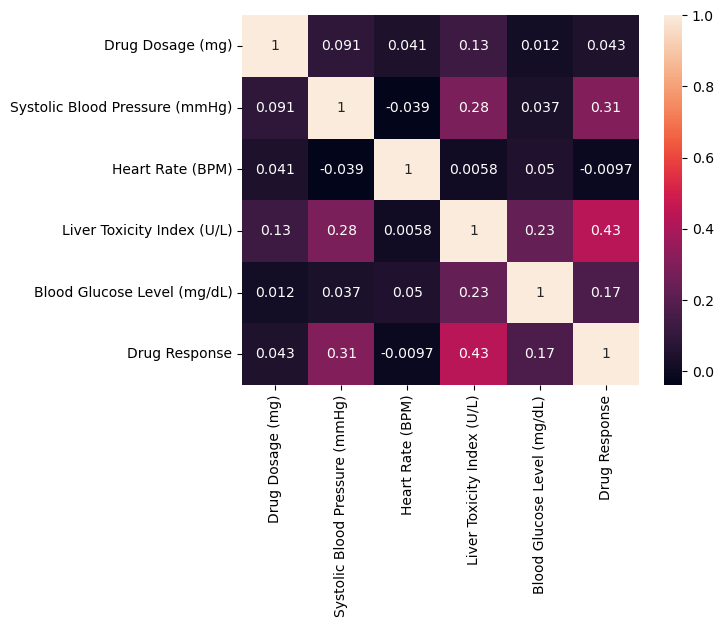

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(corr,annot=True)
plt.show()

array([[<Axes: title={'center': 'Drug Dosage (mg)'}>,
        <Axes: title={'center': 'Systolic Blood Pressure (mmHg)'}>],
       [<Axes: title={'center': 'Heart Rate (BPM)'}>,
        <Axes: title={'center': 'Liver Toxicity Index (U/L)'}>],
       [<Axes: title={'center': 'Blood Glucose Level (mg/dL)'}>,
        <Axes: title={'center': 'Drug Response'}>]], dtype=object)

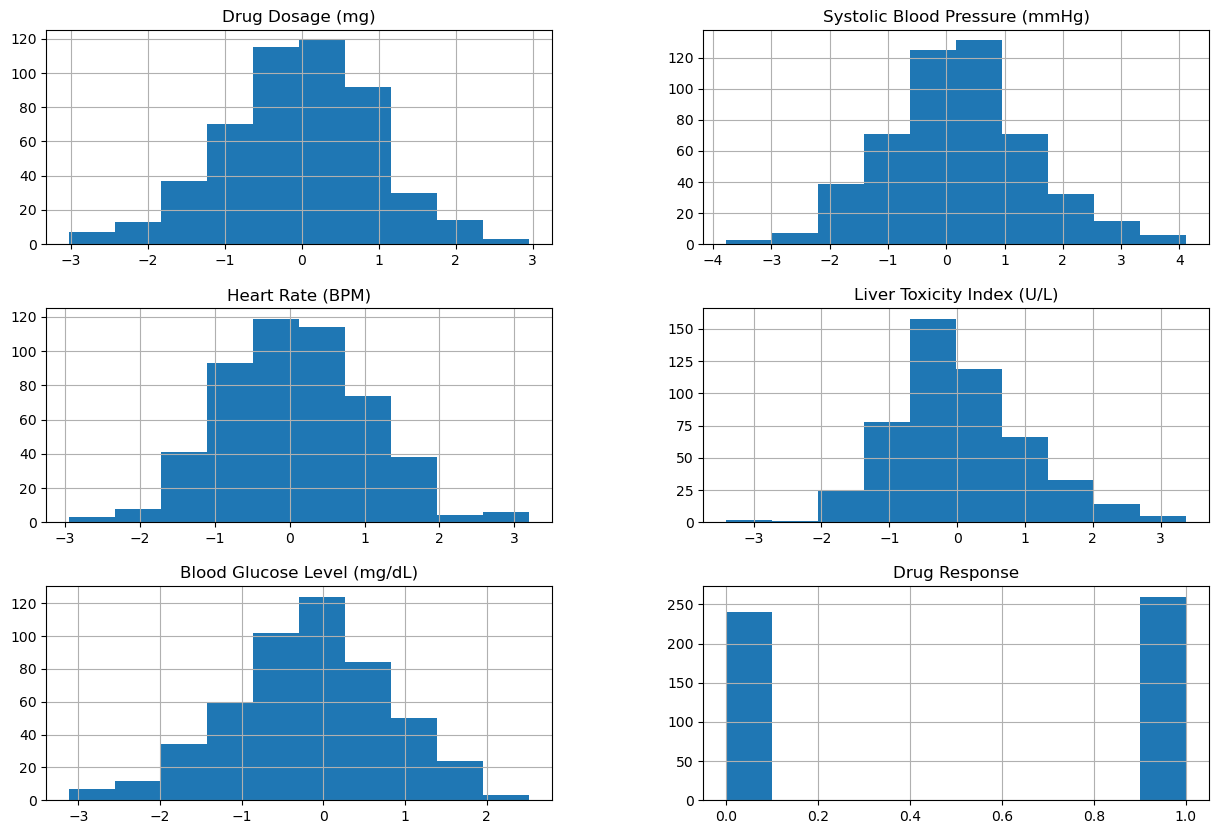

In [16]:
df.hist(figsize=(15,10))

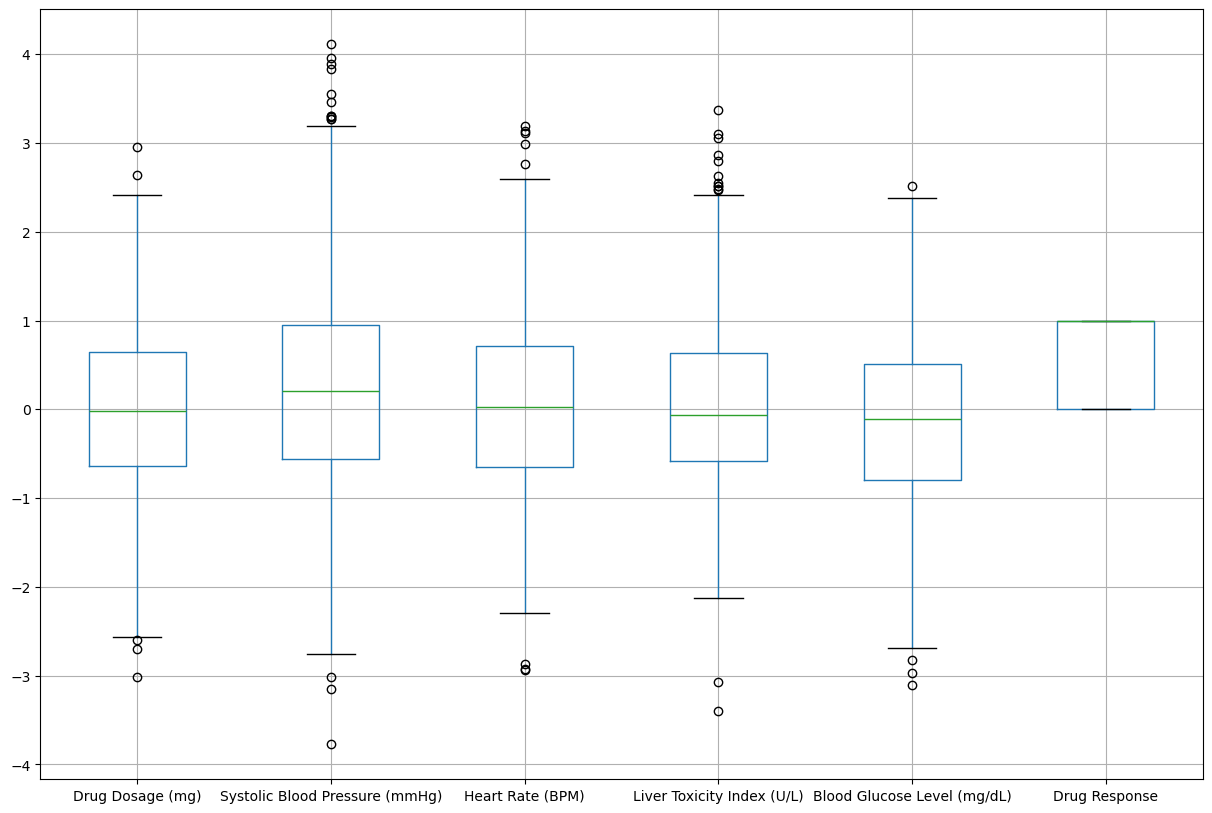

In [21]:
df.boxplot(figsize=(15,10))
plt.show()

In [27]:
### outlier capping
def outlier_capping(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    lower_extreme= Q1-1.5*IQR
    upper_extreme= Q3+1.5*IQR
    df[column]= df[column].apply(lambda x: lower_extreme if x<lower_extreme else upper_extreme if x>upper_extreme else x)
for col in df.select_dtypes(['int','float']).columns:
    outlier_capping(df,col)

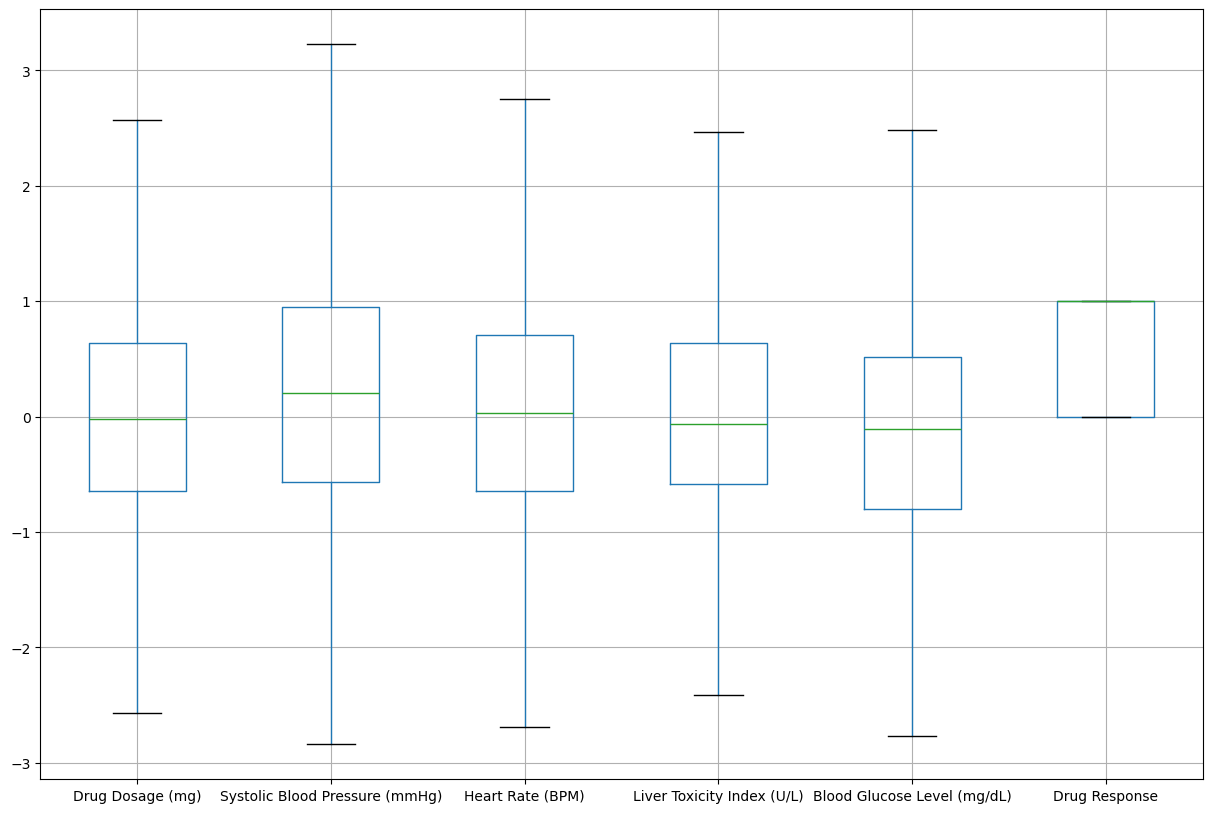

In [28]:
df.boxplot(figsize=(15,10))
plt.show()

In [29]:
target=df[['Drug Response']]
features=df.drop(columns=['Drug Response'])

In [30]:
x_train,x_test,y_train,y_test= train_test_split(features,target,train_size=0.75,random_state=100)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(375, 5)
(125, 5)
(375, 1)
(125, 1)


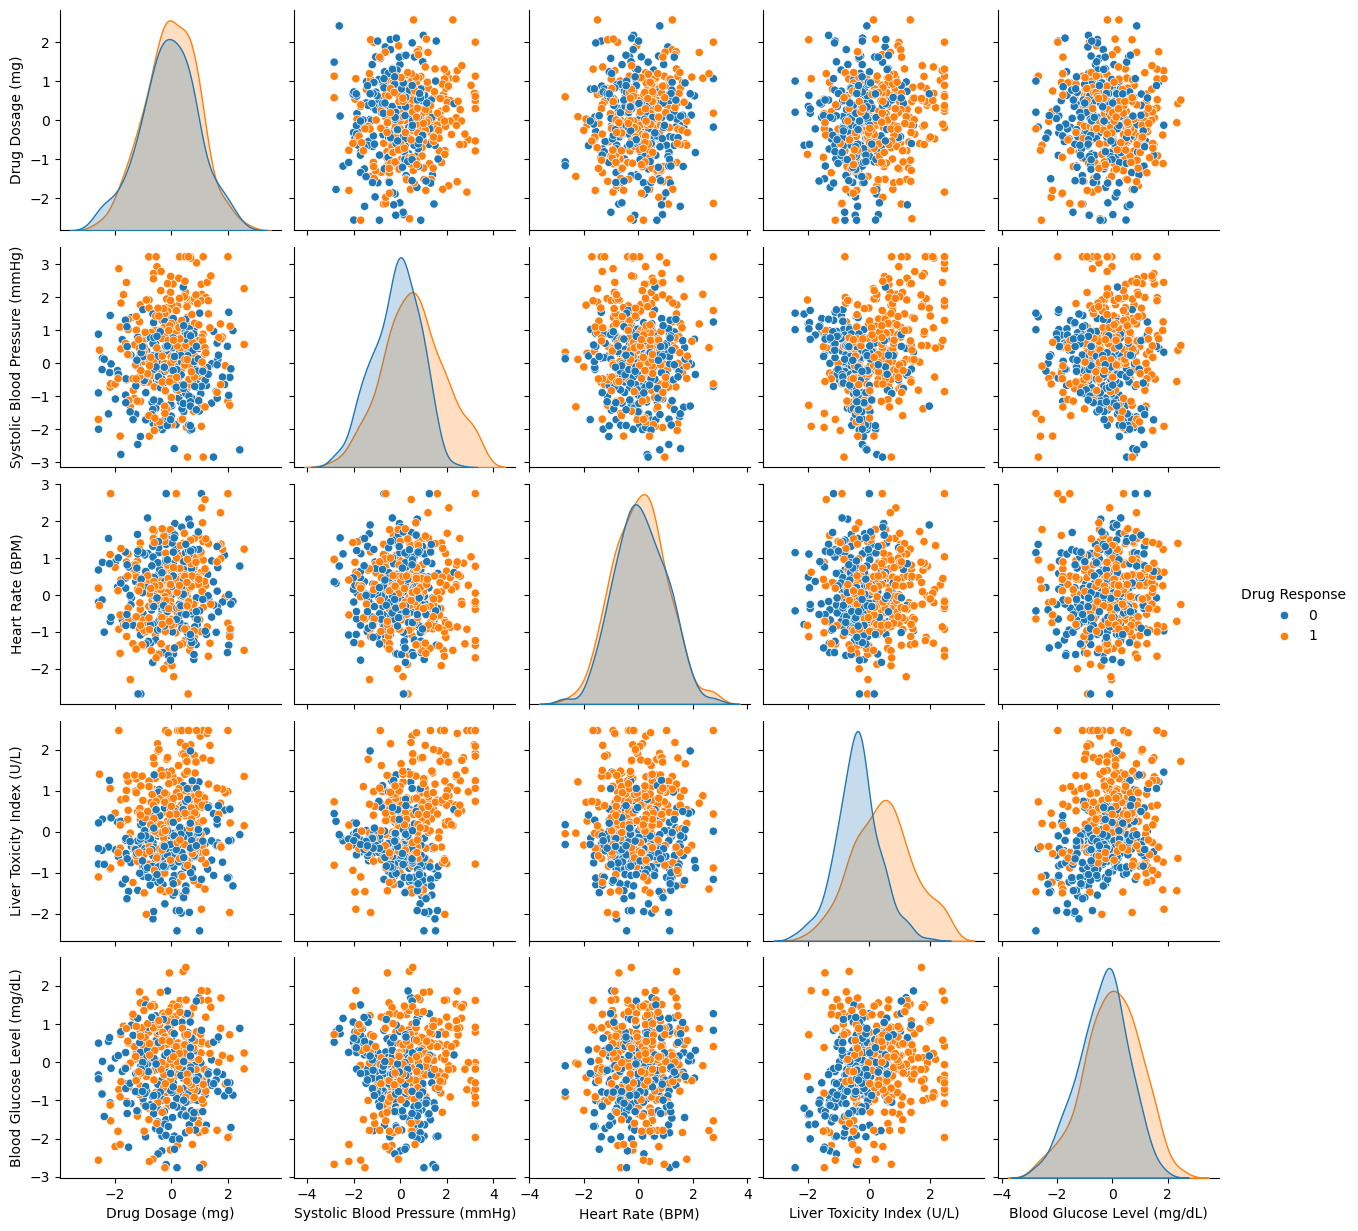

In [31]:
sns.pairplot(df, hue='Drug Response', diag_kind='kde')
plt.show()

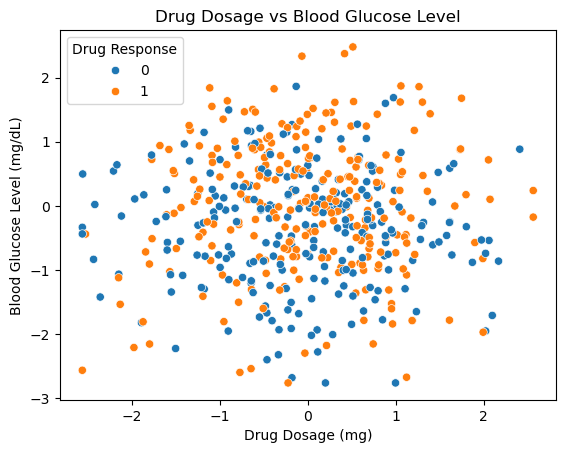

In [33]:
sns.scatterplot(data=df, x='Drug Dosage (mg)', y='Blood Glucose Level (mg/dL)', hue='Drug Response')
plt.title('Drug Dosage vs Blood Glucose Level')
plt.show()

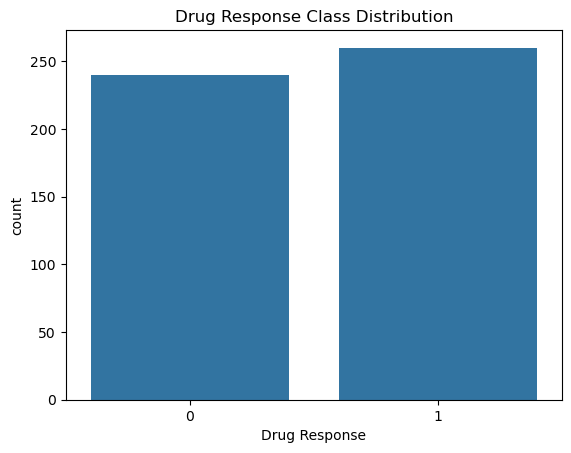

In [34]:
### class distribution
sns.countplot(x='Drug Response', data=df)
plt.title('Drug Response Class Distribution')
plt.show()

In [35]:
from sklearn import svm

In [36]:
from sklearn.svm import SVC

In [44]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [39]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [40]:
#### model building
svc=SVC(C=1,kernel='linear')
svc.fit(x_train_scaled,y_train)

,C,1
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [65]:
y_pred=svc.predict(x_test_scaled)
Accuracy=accuracy_score(y_test,y_pred)
Accuracy

0.696

In [45]:
precision = precision_score(y_test, y_pred, average='binary') 
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

In [47]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7936507936507936
Recall: 0.6666666666666666
F1-score: 0.7246376811594203


In [48]:
from sklearn.metrics import classification_report,confusion_matrix

In [52]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[37, 13],
       [25, 50]])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.74      0.66        50
           1       0.79      0.67      0.72        75

    accuracy                           0.70       125
   macro avg       0.70      0.70      0.69       125
weighted avg       0.71      0.70      0.70       125



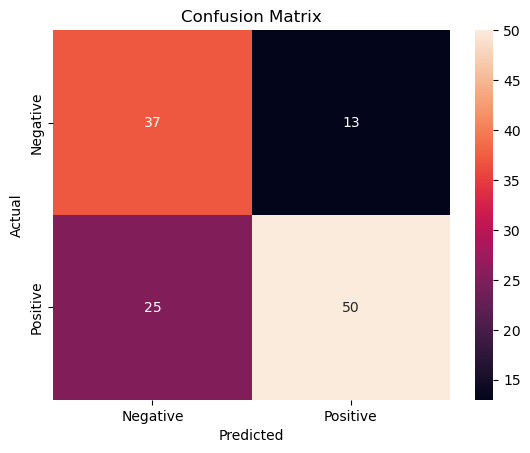

In [53]:
sns.heatmap(cm, annot=True, xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
# 1. Linear kernel
param_grid_linear = {'C': [0.01,0.1, 1, 10, 100], 'kernel': ['linear']}

In [57]:
# 2. RBF kernel
param_grid_rbf = {'C': [0.01,0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}

In [58]:
# 3. Poly kernel (only poly needs degree)
param_grid_poly = {
    'C': [0.01,0.1, 1, 10],
    'gamma': ['scale'],
    'degree': [2, 3],
    'kernel': ['poly']}

In [59]:
# 4. Sigmoid kernel
param_grid_sigmoid = {'C': [0.01,0.1, 1], 'gamma': ['scale'], 'kernel': ['sigmoid']}

In [60]:
# Combine all
param_grid_all = [param_grid_linear, param_grid_rbf, param_grid_poly, param_grid_sigmoid]
grid = GridSearchCV(SVC(), param_grid_all, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
grid.fit(x_train, y_train)
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

Fitting 5 folds for each of 26 candidates, totalling 130 fits
Best parameters: {'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}
Best CV accuracy: 0.7626666666666666


In [61]:
best_svm=grid.best_estimator_
best_pred=best_svm.predict(x_test_scaled)
print("Test Accuracy:", best_svm.score(x_test_scaled, y_test))
print("Classification Report:\n", classification_report(y_test,best_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test,best_pred))

Test Accuracy: 0.728
Classification Report:
               precision    recall  f1-score   support

           0       0.62      0.80      0.70        50
           1       0.84      0.68      0.75        75

    accuracy                           0.73       125
   macro avg       0.73      0.74      0.73       125
weighted avg       0.75      0.73      0.73       125

Confusion Matrix:
 [[40 10]
 [24 51]]


In [72]:
#### Linear kernel: Works well if data is mostly linearly separable. Simple and faster.
#### Polynomial kernel: Can capture non-linear patterns but may overfit if degree is high.
#### RBF kernel: Flexible and handles complex, non-linear relationships, often giving the best performance for small-to-medium datasets.

In [73]:
### svm strength
### Good at handling small-to-medium datasets with high dimensionality,Works well when classes are well-separated in feature space
### weakness
### SVMs can be sensitive to feature scaling,May struggle with imbalanced datasets,Kernel selection and hyperparameter tuning can be complex.

In [74]:
### practical implications of SVM in real-world classification tasks
### Excellent for medical diagnosis,Effective in high-dimensional spaces
### Not very interpretable,Sensitive to outliers; misclassification may occur if extreme values exist.